# JOSE RAFAEL NARDULLI COTO
## Comision 22740 DataScience
## Tutor: Juan Felipe Gonzalez Sanmiguel
### Desafio entregable: ANÁLISIS BIVARIADO DEL PROYECTO
#### Consigna: Realizar un pequeño análisis bivariado de datos, teniendo en cuenta las características de las observaciones.
#### Generar al menos 3 gráficos asociados.
#### Importe de bibliotecas esenciales

In [34]:
# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling
import tkinter

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Carga del dataframe

In [35]:
data = pd.read_csv('Data/Ames_Housing_Data.csv')
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Analisis general del dataframe 

In [37]:
#forma 
data.shape

(2930, 81)

In [38]:
#registros
data.count()

PID               2930
MS SubClass       2930
MS Zoning         2930
Lot Frontage      2440
Lot Area          2930
                  ... 
Mo Sold           2930
Yr Sold           2930
Sale Type         2930
Sale Condition    2930
SalePrice         2930
Length: 81, dtype: int64

In [39]:
#tipos de datos por columna 
data.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

In [40]:
#estructura del dataset
type(data)

pandas.core.frame.DataFrame

In [41]:
#Principales medidas estadisticas
data.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### data profiling (toma bastante tiempo)

In [42]:
#profile = pandas_profiling.ProfileReport(data)
#profile

#### Se usa un mapa de calor para detectar las diferentes correlaciones entre el dataset 

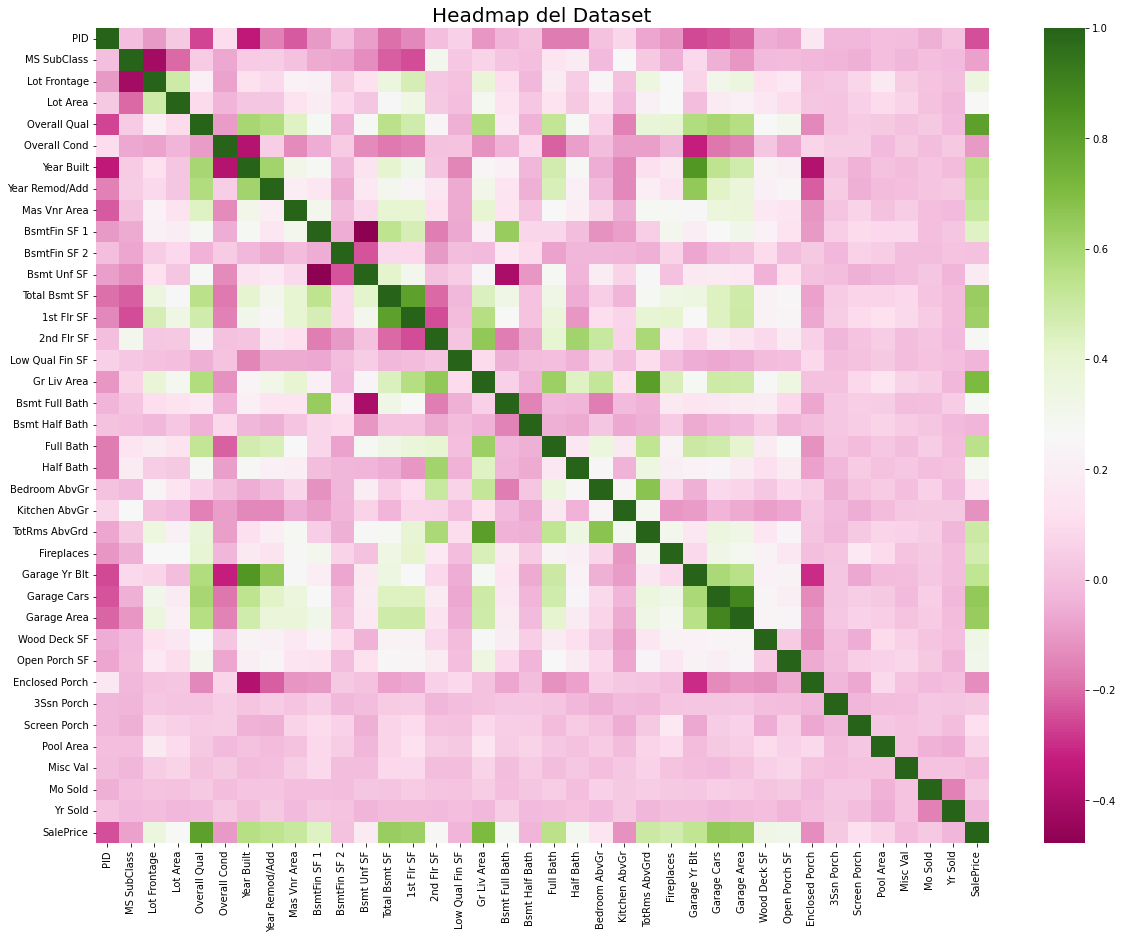

In [58]:
plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(data.corr(), annot =False, cmap='PiYG')
plt.title('Headmap del Dataset', fontsize = 20)
plt.show()

#### entre todas las relaciones posibles para este caso de estudio se decidio usar la correlacion entre la fecha de construccion y el precio de venta de una propiedad

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

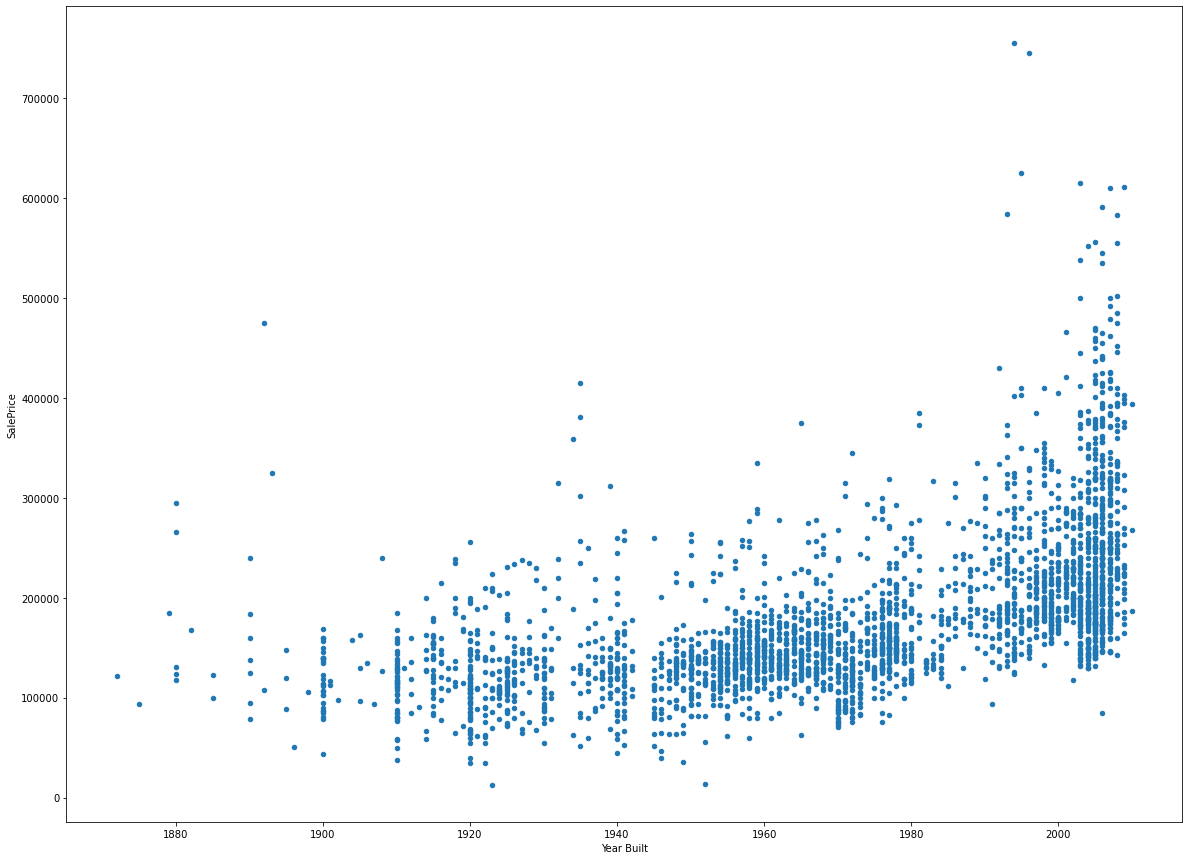

In [47]:
data.plot.scatter(x='Year Built', y='SalePrice')

#### este mapa de puntos nos demuestra que las propiedades comienzan a ascender en precio mientras menos años tengan de construidas un aspecto que se diferencia mas a partir del año 2000

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

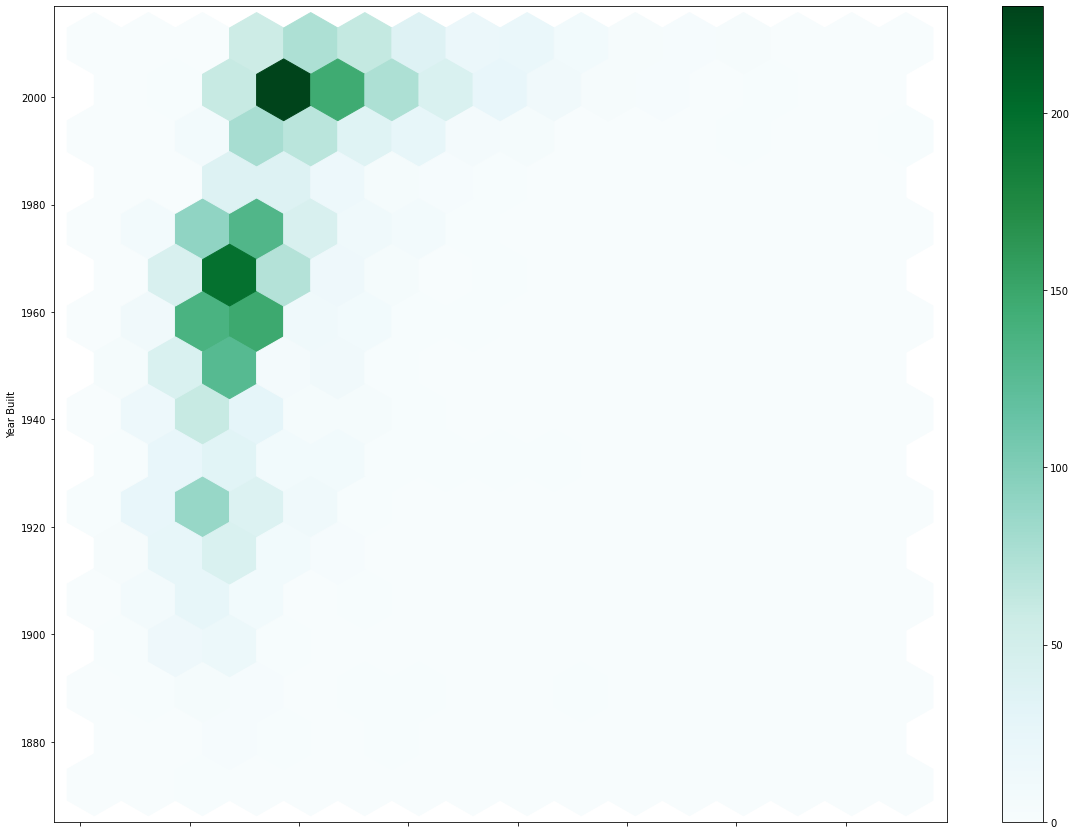

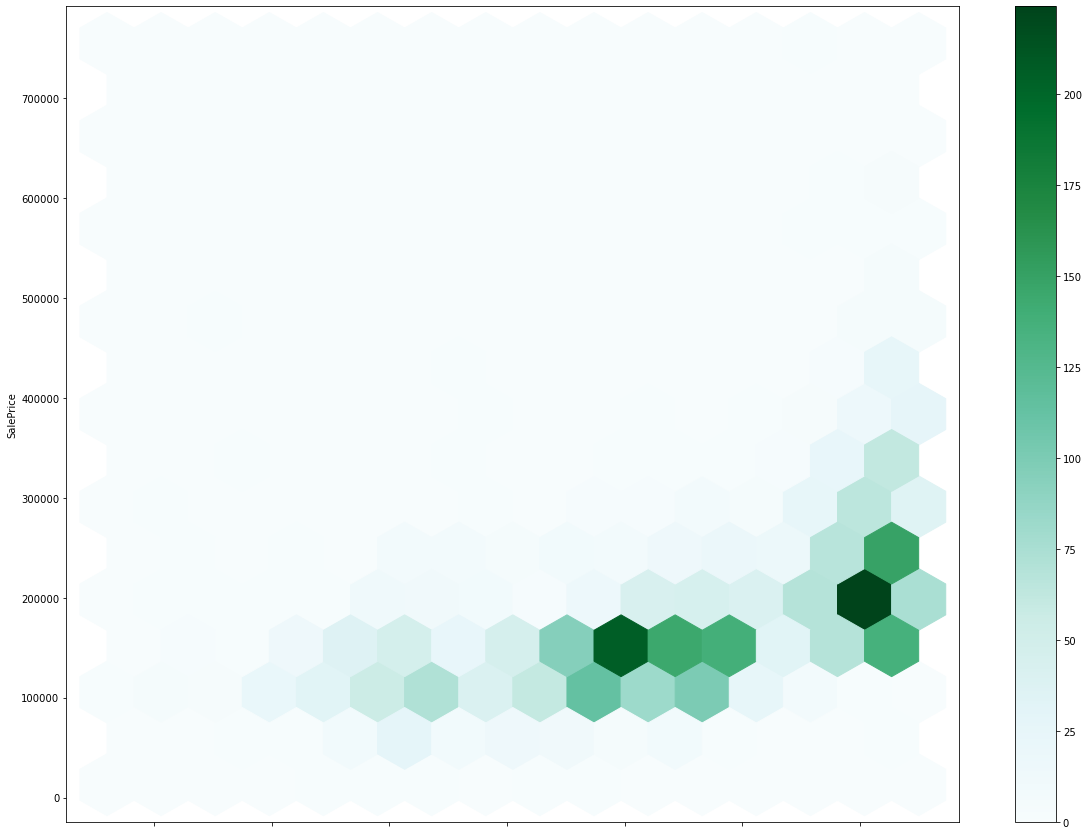

In [61]:
data.plot.hexbin(x='SalePrice', y='Year Built', gridsize=15)
data.plot.hexbin(x='Year Built', y='SalePrice', gridsize=15)

#### este mapa demuestra que la mayoria de correlacion entre precio y antiguedad de una propiedad se concentra en las propiedades construidas entre 1960 y 1980 a un precio general de 200,000.00 dolares y existe otra correlaccion anteriormente vista entre las propiedades construidas a partir del año 2000 en un precio de 700,000.00

<AxesSubplot:ylabel='Density'>

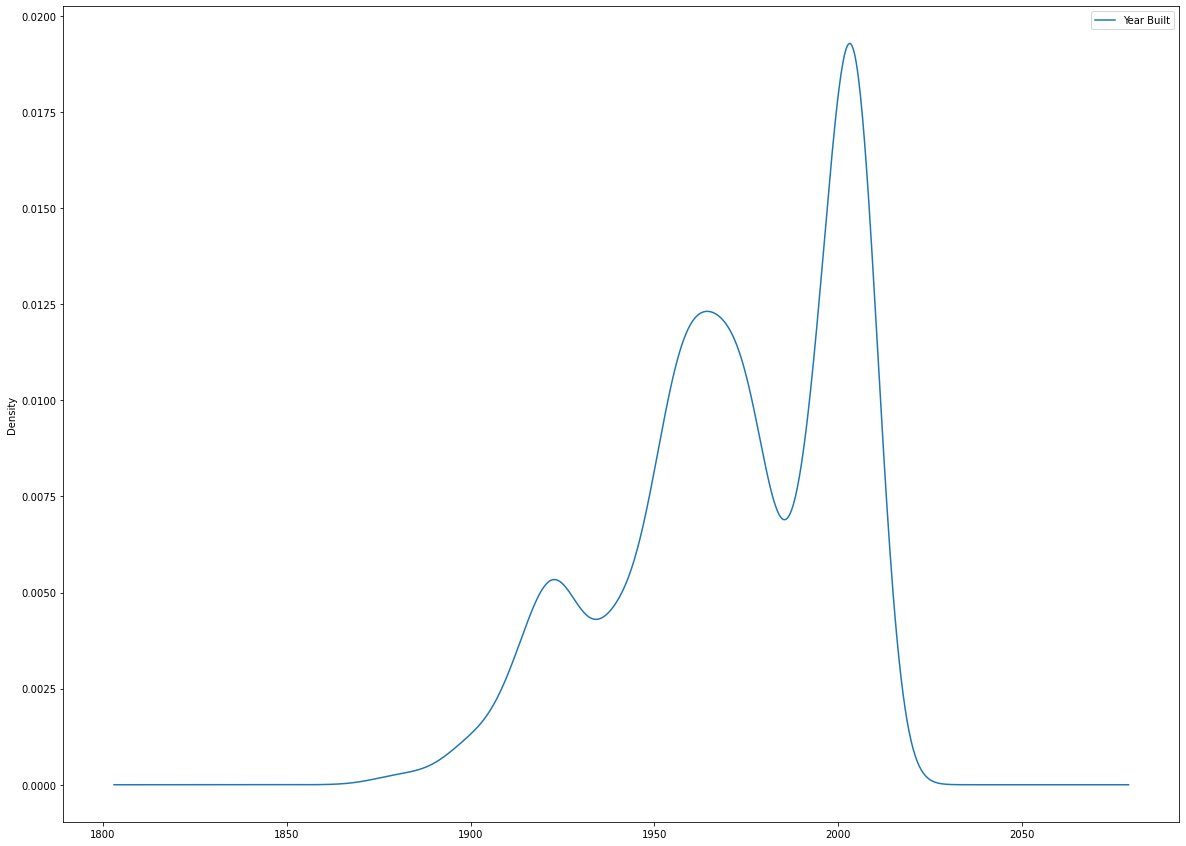

In [63]:
data.plot.kde(x='SalePrice', y='Year Built')

#### este grafico nos muestra los diferentes picos de precios dentro de las propiedades segun su año de construccion, se puede observar que hay casos en los que una propiedad mas nueva puede tener un menor precio si se ubica en el descenso de los picos 